<a href="https://colab.research.google.com/github/Archita0304/dynamic_pricing_analysis/blob/main/dynamic_pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Clean the Data

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Amazon Sale Report.csv")
df = df[df['Status'].str.contains('Shipped', na=False)]
df = df[(df['Qty'] > 0) & (df['Amount'] > 0)]
df = df.dropna(subset=['Amount', 'Qty', 'SKU'])
df.head()


/tmp/ipython-input-81-2148782609.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


# Group Data by SKU and Price

In [ ]:
df_grouped = df.groupby(['SKU', 'Amount']).agg({'Qty': 'sum'}).reset_index()
df_grouped.rename(columns={'Amount': 'Price', 'Qty': 'Units_Sold'}, inplace=True)

# Remove outliers
Q1 = df_grouped['Price'].quantile(0.25)
Q3 = df_grouped['Price'].quantile(0.75)
IQR = Q3 - Q1
df_grouped = df_grouped[(df_grouped['Price'] >= Q1 - 1.5 * IQR) &
                        (df_grouped['Price'] <= Q3 + 1.5 * IQR)]

df_grouped.head()


,SKU,Price,Units_Sold
0,AN201-RED-M,229.0,2
1,AN201-RED-XL,301.0,2
2,AN201-RED-XXL,229.0,1
3,AN202-ORANGE-M,229.0,1
4,AN202-ORANGE-M,301.0,1


from matplotlib import pyplot as plt
_df_23['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Units_Sold'].plot(kind='hist', bins=20, title='Units_Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('SKU').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Price', y='Units_Sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Units_Sold'].plot(kind='line', figsize=(8, 4), title='Units_Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['SKU'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Price', y='SKU', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['SKU'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Units_Sold', y='SKU', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

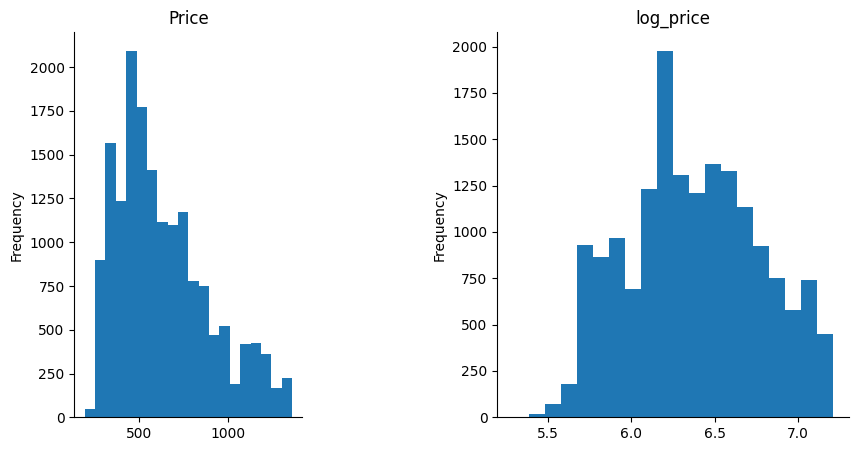

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
df_grouped['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)


plt.subplot(1,2,2)
df_grouped['log_price'].plot(kind='hist', bins=20, title='log_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Estimate Price Elasticity Using Log-Log Regression

In [ ]:
import numpy as np
import statsmodels.api as sm

# Log-transform
df_grouped['log_price'] = np.log(df_grouped['Price'])
df_grouped['log_qty'] = np.log(df_grouped['Units_Sold'])

# Regression
X = sm.add_constant(df_grouped['log_price'])
y = df_grouped['log_qty']
model = sm.OLS(y, X).fit()

# Elasticity = coefficient of log_price
elasticity = model.params['log_price']
print(f"Price Elasticity Estimate: {elasticity:.2f}")
print(model.summary())


Price Elasticity Estimate: 0.17
                            OLS Regression Results                            
Dep. Variable:                log_qty   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     69.01
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.05e-16
Time:                        10:49:05   Log-Likelihood:                -24552.
No. Observations:               16725   AIC:                         4.911e+04
Df Residuals:                   16723   BIC:                         4.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.059

# Simulate Profit Impact

In [ ]:
# Assume cost = 60% of average price
avg_price = df_grouped['Price'].mean()
avg_cost = avg_price * 0.6

def simulate_profit(price_change_pct):
    new_price = avg_price * (1 + price_change_pct)
    demand_multiplier = (new_price / avg_price) ** elasticity
    new_units = df_grouped['Units_Sold'].mean() * demand_multiplier
    revenue = new_price * new_units
    cost = avg_cost * new_units
    profit = revenue - cost
    return new_price, new_units, revenue, profit

# Simulate for -10%, 0%, +10% price changes
for pct in [-0.1, 0, 0.1]:
    p, q, r, pr = simulate_profit(pct)
    print(f"Price {pct*100:+.0f}% → ₹{p:.2f}, Units: {q:.0f}, Revenue: ₹{r:.2f}, Profit: ₹{pr:.2f}")


Price -10% → ₹572.92, Units: 6, Revenue: ₹3543.30, Profit: ₹1181.10
Price +0% → ₹636.57, Units: 6, Revenue: ₹4007.92, Profit: ₹1603.17
Price +10% → ₹700.23, Units: 6, Revenue: ₹4480.49, Profit: ₹2036.58


# Plot Elasticity Curve

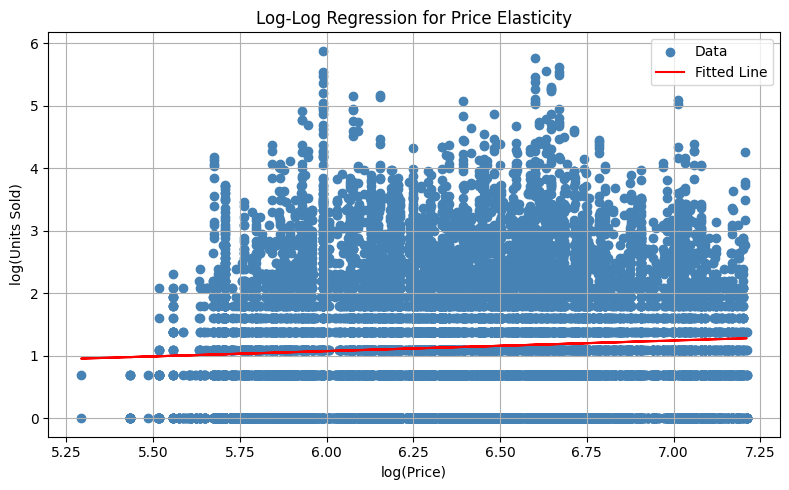

In [ ]:
import matplotlib.pyplot as plt

# Plot log-log demand curve
plt.figure(figsize=(8, 5))
plt.scatter(df_grouped['log_price'], df_grouped['log_qty'], color='steelblue', label='Data')
plt.plot(df_grouped['log_price'], model.predict(X), color='red', label='Fitted Line')
plt.title("Log-Log Regression for Price Elasticity")
plt.xlabel("log(Price)")
plt.ylabel("log(Units Sold)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Segmentation by Category

In [ ]:
for category in df['Category'].unique():
    sub = df[df['Category'] == category].copy()  # Important: use .copy() here to avoid view vs copy issues
    sub.loc[:, 'log_price'] = np.log(sub['Amount'])
    sub.loc[:, 'log_qty'] = np.log(sub['Qty'])

    if sub['log_price'].isnull().any() or sub['log_qty'].isnull().any():
        continue  # skip if log transformation failed

    model = smf.ols('log_qty ~ log_price', data=sub).fit()
    elasticity = model.params['log_price']
    print(f"Category: {category} → Elasticity: {elasticity:.2f}")


Category: kurta → Elasticity: 0.04
Category: Top → Elasticity: 0.03
Category: Set → Elasticity: 0.02
Category: Western Dress → Elasticity: 0.06
Category: Ethnic Dress → Elasticity: 0.00
Category: Bottom → Elasticity: 0.08
Category: Saree → Elasticity: 0.32
Category: Blouse → Elasticity: 0.03
Category: Dupatta → Elasticity: 0.00
